# Project: Write a Data Science Blog Post
# Exploratory Analysis Airbnb 2021 - Boston

## 1. Business Understanding


[Airbnb](https://www.airbnb.com) is an American company, where people can place their homestay or search for one on the online marketplace for lodging. Guest will need to share some personal and payment information with Airbnb and host will also, what's make Airbnb secure. If you have the possibility to rent a place, it is a good opportunitiy and a start to new extra income by creating a new host account with Airbnb.

Using the data collected by [inside Airbnb](http://insideairbnb.com/about.html), this notebook will do exploratory analysis to share insights with people who are interesting to become a host and what can they do to improve by answering the following questions:

* **How the Respose time to a guest can impact on the booking?**
* **Becoming a Superhost will help to get more bookings?**
* **How the reviews can impact on the bookings?**

## 2. Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

%matplotlib inline

pd.set_option('display.max_columns',None)

### 2.1. Reading files
---

Here we will work with three data sets:

* Listing - Information regarding the places availables to rent in Boston
* Calendar - Availability for each listing on the previous data set
* Reviews - Evaluation comments from the users to each listings.

If you want more info. about each variable follow the [link](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896).

In [2]:
listing = pd.read_csv("files/Bostonlistings.csv")
calendar = pd.read_csv("files/Bostoncalendar.csv")
reviews = pd.read_csv("files/Bostonreviews.csv")

### 2.2. Calendar Data set
___

In [3]:
calendar.shape

(1147671, 7)

In [4]:
calendar.head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,45987,2021-04-21,f,$125.00,$125.00,29.0,180.0
1,3781,2021-04-21,f,$125.00,$125.00,32.0,1125.0
2,3781,2021-04-22,f,$125.00,$125.00,32.0,1125.0
3,3781,2021-04-23,f,$125.00,$125.00,32.0,1125.0
4,3781,2021-04-24,f,$125.00,$125.00,32.0,1125.0
5,3781,2021-04-25,f,$125.00,$125.00,32.0,1125.0
6,3781,2021-04-26,f,$125.00,$125.00,32.0,1125.0
7,3781,2021-04-27,f,$125.00,$125.00,32.0,1125.0
8,3781,2021-04-28,f,$125.00,$125.00,32.0,1125.0
9,3781,2021-04-29,f,$125.00,$125.00,32.0,1125.0


In [5]:
calendar.dtypes

listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

In [6]:
calendar.isna().sum()

listing_id          0
date                0
available           0
price               0
adjusted_price      0
minimum_nights    112
maximum_nights    112
dtype: int64

In [7]:
calendar[calendar['maximum_nights'].isna()]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
7577,22195,2021-04-21,f,$108.00,$108.00,NaN,NaN
41542,5358934,2021-04-21,t,$42.00,$42.00,NaN,NaN
67961,5856633,2021-04-21,f,$350.00,$350.00,NaN,NaN
84208,6248970,2021-04-21,f,$49.00,$49.00,NaN,NaN
89797,4566095,2021-04-21,f,$140.00,$140.00,NaN,NaN
...,...,...,...,...,...,...,...
1120825,28201782,2021-04-21,f,$159.00,$159.00,NaN,NaN
1125671,49077686,2021-04-21,f,$229.00,$229.00,NaN,NaN
1126883,49079563,2021-04-21,f,$95.00,$95.00,NaN,NaN
1129568,48999351,2021-04-21,f,$32.00,$32.00,NaN,NaN


In [8]:
all(calendar[calendar['maximum_nights'].isna()]['minimum_nights'].isna())

True

In [9]:
calendar[calendar['maximum_nights'].isna()]['listing_id'].value_counts().sort_values(ascending = False)

19540224    1
8067585     1
48954628    1
24079621    1
23948295    1
           ..
42432751    1
6716872     1
30516467    1
43639005    1
13530359    1
Name: listing_id, Length: 112, dtype: int64

In [10]:
calendar.available.value_counts()

t    591713
f    555958
Name: available, dtype: int64

Some details of the Caledar data set:
* 112 lines, where `maximum_nights` and `minimum_nights` are empty for different listings.
* object types defined for the `date` and prices variables.

### 2.3. Reviews Data set
___

In [11]:
reviews.shape

(113336, 6)

In [12]:
reviews.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...
5,3781,63371931,2016-02-22,55456499,John-Mark,Frank was very accommodating throughout my sta...
6,3781,67909504,2016-04-01,55456499,John-Mark,Excellent! This was my second stay at the Jeff...
7,3781,97906006,2016-08-28,88528884,Elisa,Frank was a wonderful and accommodating host. ...
8,3781,105143774,2016-09-30,1342806,Nicole,"Frank was great, the apartment has everything ..."
9,3781,129692749,2017-02-01,55126634,Carlos,Very nice. Comfortable apartment. Good locatio...


In [13]:
reviews.isna().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     1
comments         74
dtype: int64

For the Reviews Data set some comments are empty, but it can be interesting to keep those lines because of the others collumns, like date, have information.

### 2.4. Listing Data set
___

In [14]:
listing.shape

(3146, 74)

In [15]:
listing.head(10)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20210420194355,2021-04-21,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently oc...,within a day,100%,41%,f,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,East Boston,5.0,5.0,"['email', 'phone', 'reviews']",t,f,"Boston, Massachusetts, United States",East Boston,NaN,42.36413,-71.02991,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,0.0,"[""Washer"", ""Dishwasher"", ""Refrigerator"", ""Pati...",$125.00,32,1125,32.0,32.0,1125.0,1125.0,32.0,1125.0,NaN,t,1,1,1,106,2021-04-21,19,3,0,2015-07-10,2021-02-26,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.27
1,6695,https://www.airbnb.com/rooms/6695,20210420194355,2021-04-21,$99 Special!! Home Away! Condo,"Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,"Boston, Massachusetts, United States","Relaxed, Easy going, Accommodating.",NaN,NaN,NaN,t,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,Roxbury,4.0,4.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Boston, Massachusetts, United States",Roxbury,NaN,42.32802,-71.09387,Entire condominium,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Washer"", ""Dishwasher"", ""Fire extinguisher"", ...",$169.00,29,730,29.0,29.0,730.0,730.0,29.0,730.0,NaN,t,8,19,40,40,2021-04-21,115,0,0,2009-08-06,2019-11-02,96.0,10.0,10.0,10.0,10.0,9.0,10.0,STR-404620,f,4,4,0,0,0.81
2,10813,https://www.airbnb.com/rooms/10813,20210420194355,2021-04-23,"Back Bay Apt-blocks to subway, Newbury St, The...",Stunning Back Bay furnished studio apartment. ...,Wander around this quintessential neighborhood...,https://a0.muscache.com/pictures/20b5b9c9-e1f4...,38997,https://www.airbnb.com/users/show/38997,Michelle,2009-09-16,US,NaN,within a few hours,97%,17%,f,https://a0.muscache.com/im/pictures/user/13444...,https://a0.muscache.com/im/pictures/user/13444...,Back Bay,15.0,15.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Boston, Massachusetts, United States",Back Bay,NaN,42.35061,-71.08787,Entire apartment,Entire home/apt,3,NaN,1 bath,NaN,1.0,"[""Wifi"", ""Kitchen"", ""Dishwasher"", ""Refrigerato...",$96.00,29,1125,29.0,29.0,1125.0,1125.0,29.0,1125.0,NaN,t,29,59,63,307,2021-04-23,5,1,0,2016-05-23,2020-12-02,99.0,10.0,10.0,10.0,10.0,10.0,

In [16]:
Missing_values = pd.DataFrame(listing.isna().sum()[listing.isna().sum().values > 0], columns=['Missing_Count'])
Missing_values.sort_values(by = 'Missing_Count', ascending=False)

,Missing_Count
calendar_updated,3146
bathrooms,3146
neighbourhood_group_cleansed,3146
license,1552
host_about,1145
neighborhood_overview,1014
neighbourhood,1014
review_scores_checkin,1000
review_scores_accuracy,999
review_scores_location,999


In the Listing data set the variables **calendar_updated**, **bathrooms** and **neighbourhood_group_cleansed** are totally empty.

## 3. Data Preparation

### 3.1. Preparing Calendar Dataset
___

Changes:
 * Converts price and adjusted_price from string to float
 * Converts available column to boolean
 * Converts date from string to date

In [17]:
calendar['price'] = calendar['price'].str.replace(pat = '\$|,',repl = '',regex = True).astype(dtype = float)
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace(pat = '\$|,',repl = '', regex = True).astype(dtype = float)
calendar['available'] = calendar['available'] == 't'
calendar['date'] = pd.to_datetime(calendar['date'])

### 3.2. Preparing Reviews Dataset
___

Changes:
 * Converts date column from string to date

In [18]:
reviews['date'] = pd.to_datetime(reviews['date'])

### 3.3. Preparing Listing Dataset
___

Changes:

* Drop column with na in all lines
* Converts *last_scraped*, *host_since*, *calendar_last_scraped*, *first_review* and *last_review* from string to date
* Converts *price*, *host_response_rate* and *host_acceptance_rate* from string to float
* Converts *host_is_superhost*, *host_has_profile_pic*, *host_identity_verified*, *has_availability* and *instant_bookable* to boolean

In [19]:
listing = listing.dropna(axis=1, how='all')

listing['last_scraped'] = pd.to_datetime(listing['last_scraped'])
listing['host_since'] = pd.to_datetime(listing['host_since'])
listing['calendar_last_scraped'] = pd.to_datetime(listing['calendar_last_scraped'])
listing['first_review'] = pd.to_datetime(listing['first_review'])
listing['last_review'] = pd.to_datetime(listing['last_review'])
listing['price'] = listing['price'].str.replace(pat = '\$|,',repl='',regex = True).astype(dtype = float)
listing['host_response_rate'] = listing['host_response_rate'].str.strip('%').astype(dtype = float)*(0.01)
listing['host_acceptance_rate'] = listing['host_acceptance_rate'].str.strip('%').astype(dtype = float)*(0.01)


In [20]:
for col in listing[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']].columns:
    i = []
    for value in listing[col]:
        if value == 't':
            i.append(True)
        elif value == 'f':
            i.append(False)
        else: i.append(value)
    listing[col] = i

## 4. Evaluation

### 4.1 How the Respose time to a guest can impact on the booking?
___

To answer this question, will be necessary to transform the data sets to obtain a **host** related data.

The calendar data set will be aggregated by the `listing_id` and will be only considered the days that were booked.

In [21]:
aggregated_list = calendar[calendar['available'] != True].groupby('listing_id').agg({'adjusted_price' : ['mean', np.sum], 
                                                                                     'price' : ['mean', np.sum], 
                                                                                     'available':'count'})
aggregated_list.columns = [col2 + '_' + col1 for col1, col2 in aggregated_list.columns]
aggregated_list.rename(columns = {"count_available": "days_booked"}, inplace= True)

In [22]:
aggregated_list.sort_values('days_booked', ascending= False).head(10)

,mean_adjusted_price,sum_adjusted_price,mean_price,sum_price,days_booked
listing_id,,,,,
6716872,200.000000,73200.0,200.000000,73200.0,366
24940427,249.000000,91134.0,249.000000,91134.0,366
13530359,42.000000,15372.0,42.000000,15372.0,366
12254831,55.000000,20130.0,55.000000,20130.0,366
39004794,207.193989,75833.0,207.193989,75833.0,366
8390793,57.103825,20900.0,57.103825,20900.0,366
5856633,350.000000,128100.0,350.000000,128100.0,366
29010062,37.000000,13505.0,37.000000,13505.0,365
28992318,50.000000,18250.0,50.000000,18250.0,365


On the Listing data set will be selected some variables and the `listing_id` will be used to merge boths data sets. For now, the `aggregated_list` can give us some prices and `days_booked` per listing.

In [23]:
right_listing =  listing[['id', 
                          'host_id', 
                          'host_since', 
                          'host_response_time', 
                          'host_response_rate', 
                          'host_acceptance_rate', 
                          'host_is_superhost', 
                          'host_verifications', 
                          'host_has_profile_pic', 
                          'host_identity_verified']]
host_analysis =  aggregated_list.merge(right = right_listing, how = 'inner', left_index= True, right_on = 'id').sort_values('sum_adjusted_price', ascending=False)

In [24]:
host_analysis.shape

(2900, 15)

In [25]:
host_analysis.head(15)

,mean_adjusted_price,sum_adjusted_price,mean_price,sum_price,days_booked,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified
1962,10000.000000,3650000.0,10000.000000,3650000.0,365,39772945,305274008,2019-10-29,within a few hours,0.96,0.79,False,"['email', 'phone']",True,True
1961,10000.000000,3650000.0,10000.000000,3650000.0,365,39772695,305274008,2019-10-29,within a few hours,0.96,0.79,False,"['email', 'phone']",True,True
786,4907.183673,1442712.0,4907.183673,1442712.0,294,17138041,10850877,2013-12-27,NaN,NaN,NaN,False,"['email', 'phone', 'reviews', 'kba']",True,True
409,5000.000000,1305000.0,5000.000000,1305000.0,261,8116523,42431392,2015-08-24,within an hour,1.00,0.99,False,"['email', 'phone', 'reviews', 'jumio', 'govern...",True,True
1619,9910.621622,1100079.0,9910.621622,1100079.0,111,33351519,261039449,2019-05-10,within an hour,0.89,1.00,False,"['email', 'phone']",True,True
1618,9910.441441,1100059.0,9910.441441,1100059.0,111,33351516,261039449,2019-05-10,within an hour,0.89,1.00,False,"['email', 'phone']",True,True
1617,9910.351351,1100049.0,9910.351351,1100049.0,111,33351298,261039449,2019-05-10,within an hour,0.89,1.00,False,"['email', 'phone']",True,True
3130,5000.000000,685000.0,5000.000000,685000.0,137,49244928,319015619,2019-12-19,within an hour,1.00,0.99,False,"['email', 'phone', 'offline_government_id', 's...",True,True
2584,1872.877358,595575.0,1872.877358,595575.0,318,46262662,118162851,2017-02-26,within an hour,1.00,1.00,True,"['email', 'phone', 'offline_government_id', 's...",True,True
2843,1700.000000,535500.0,1700.000000,535500.0,315,48045698,60638551,2016-02-27,NaN,NaN,NaN,False,"['email', 'phone', 'reviews', 'offline_governm...",True,True


Finally, the new data set needs to be aggregated by the `host_id` to obtain the desirable data set to answer the question.

In [26]:
host_analysis =  host_analysis.groupby('host_id').agg({'mean_adjusted_price' : 'mean', 
                                                       'sum_adjusted_price': 'mean', 
                                                       'mean_price': 'mean', 
                                                       'sum_price': 'mean', 
                                                       'days_booked':'mean', 
                                                       'host_since': 'first', 
                                                       'host_response_time': 'first', 
                                                       'host_response_rate': 'first', 
                                                       'host_acceptance_rate': 'first', 
                                                       'host_is_superhost': 'first', 
                                                       'host_verifications': 'first', 
                                                       'host_has_profile_pic' : 'first', 
                                                       'host_identity_verified': 'first',
                                                       'id': 'count'})


In [27]:
host_analysis['host_response_time'].value_counts()

within an hour        438
within a few hours    116
within a day          102
a few days or more     21
Name: host_response_time, dtype: int64

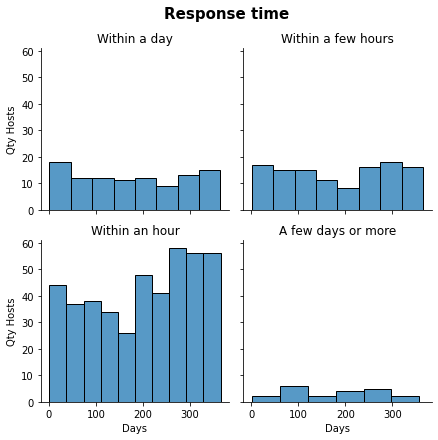

In [28]:
g = sns.FacetGrid(host_analysis, col="host_response_time", col_wrap = 2)
g.fig.suptitle('Response time', fontweight = 'bold', fontsize = 15)
g.map_dataframe(sns.histplot, x="days_booked")
axes = g.axes.flatten()
axes[0].set_title('Within a day', weight = 'normal', size = 12)
axes[1].set_title('Within a few hours', weight = 'normal', size = 12)
axes[2].set_title('Within an hour', weight = 'normal', size = 12)
axes[3].set_title('A few days or more', weight = 'normal', size = 12)
axes[0].set_ylabel('Qty Hosts')
axes[2].set_ylabel('Qty Hosts')
axes[2].set_xlabel('Days')
axes[3].set_xlabel('Days')
g.savefig("Images/fig4")

When we consider only the days that are rented on the listings and the hosts with at least one day booked, we can see how the category **within an hour** was able to get more than 2 times or even 3 times more reservations than the the others two categories.

### 4.2. Becoming a Superhost will help to get more bookings?
___

Prior to answer the question, let's take a look to the proportion of Superhost and Host from the listing data set.

In [29]:
host_listing = listing.groupby('host_id').agg({'host_total_listings_count': 'mean', 'host_is_superhost': 'first', 'id':'count'})
host_listing.rename(mapper = {'id': 'count_Listings_Boston'}, axis = 1, inplace= True)

In [30]:
host_listing.head(5)

,host_total_listings_count,host_is_superhost,count_Listings_Boston
host_id,,,
4804,5.0,False,1
7969,2.0,False,2
8229,4.0,True,4
23078,5.0,False,1
26988,7.0,True,5


In [31]:
host_listing.groupby('host_is_superhost', dropna= False).agg({'host_total_listings_count': ["mean", np.sum, 'count'], 
                                                              'count_Listings_Boston': ["mean", np.sum, 'count']})

host_total_listings_count                 \
                                       mean      sum count   
host_is_superhost                                            
False                             12.756824  10282.0   806   
True                               2.633423    977.0   371   
NaN                                     NaN      0.0     0   

                  count_Listings_Boston              
                                   mean   sum count  
host_is_superhost                                    
False                          2.870968  2314   806  
True                           2.032345   754   371  
NaN                            2.294118    78    34

As we can see from the table above, the Superhosts have 23% of the listing outside of Boston, while Hosts have more than 78% of the listings outside of Boston. 

In [32]:
host_listing.sort_values('count_Listings_Boston', ascending=False).head(10)

,host_total_listings_count,host_is_superhost,count_Listings_Boston
host_id,,,
359229620,1185.0,False,152
107434423,1486.0,False,129
814298,95.0,False,96
22348222,100.0,False,55
297860058,1.0,False,51
368944610,2232.0,False,50
9419684,424.0,False,45
212359760,47.0,False,37
30283594,451.0,False,34


For hosts *297860058*, *814298* and *18517776* the `host_total_listings_count` are smaller than `count_Listings_Boston`, what can indicate a error of the extraction or different times of extraction those variables.

Besides that, it seems that few Host accounts are in control of a lot of the listings in Airbnb, what can pull the mean to higher values.

In [33]:
host_listing['host_is_superhost'].value_counts()/host_listing.shape[0]

False    0.665566
True     0.306358
Name: host_is_superhost, dtype: float64

**30.6%** of the accounts are Superhost and **66.6%** are Host. The others 2,8% have no information, if the account is Superhost or not.

In [34]:
plt.rc('axes', titlesize = 15, titleweight = 'bold', labelsize = 12)

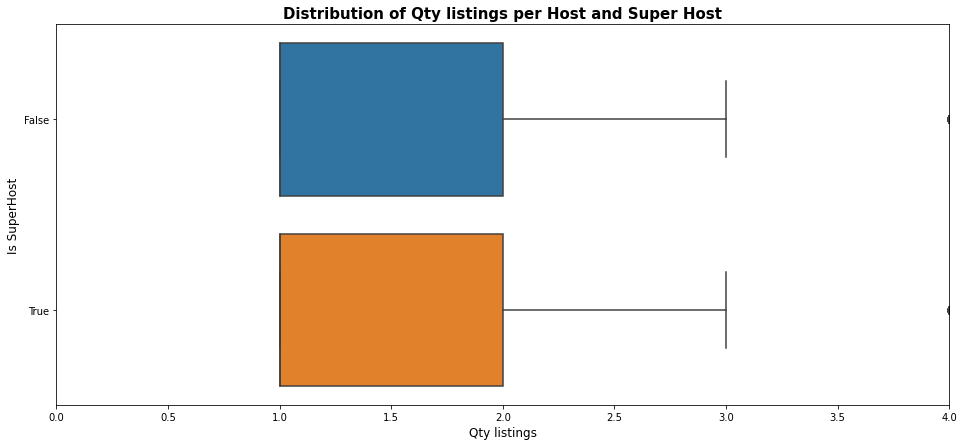

In [35]:
plt.figure(figsize=(16,7))
plt.title("Distribution of Qty listings per Host and Super Host")
plt.xlim(right = 4)
sns.boxplot(data = host_listing, 
            x = 'count_Listings_Boston', 
            y = 'host_is_superhost').set(xlabel='Qty listings', 
                                         ylabel='Is SuperHost')
plt.savefig(fname = "Images/fig1")

Looking at the Box plot, the distribution of the quantity of the listings is quite similiar, if we doesn't consider the outliers. For both categories the median was on 1.

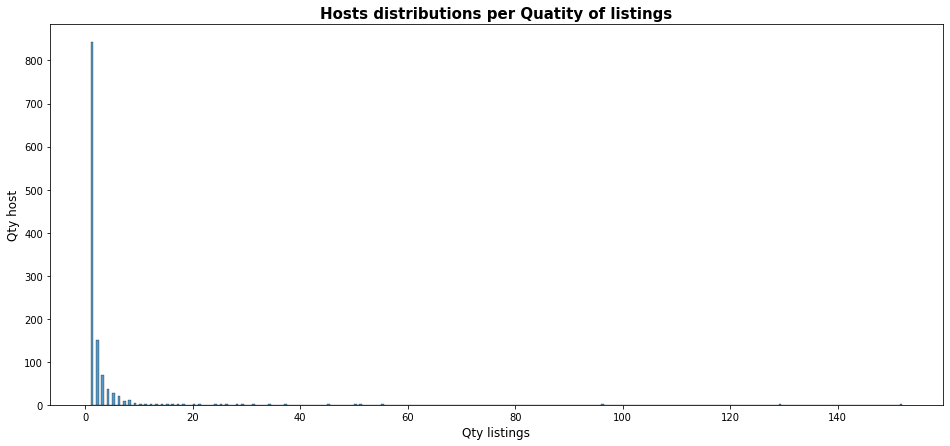

In [36]:
plt.figure(figsize=(16,7))
plt.title("Hosts distributions per Quatity of listings")
plt.ylabel('Qty host')
plt.xlabel('Qty listings')
sns.histplot(listing.groupby('host_id', dropna = False)['id'].count(), bins = 302)
plt.savefig(fname = "Images/fig2")

Through the histogram above, we can see that almost 70% of the host only have 1 listing, while 1 account has 152 listings in Boston.

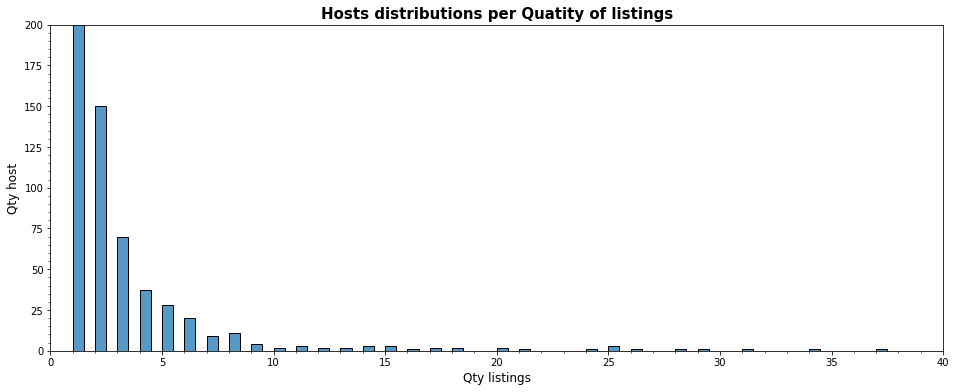

In [37]:
plt.figure(figsize=(16,6))
plt.title("Hosts distributions per Quatity of listings")
plt.ylim(0,200)
plt.xlim(0,40)
plt.minorticks_on()
plt.ylabel('Qty host')
plt.xlabel('Qty listings')
sns.histplot(listing.groupby('host_id', dropna = False)['id'].count(), bins = 302)
plt.savefig(fname = "Images/fig3")

Around 85% of the hosts have until 3 listings in their accounts.

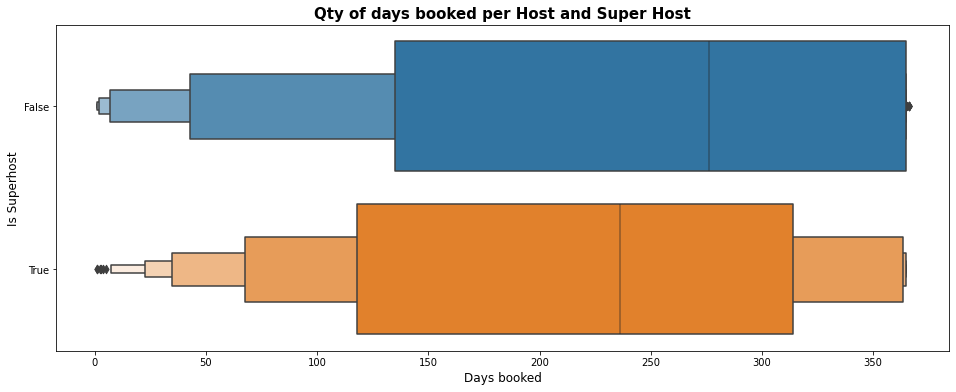

In [38]:
plt.figure(figsize=(16,6))
plt.title("Qty of days booked per Host and Super Host")
sns.boxenplot(data = host_analysis, x = 'days_booked', y = 'host_is_superhost')
plt.xlabel("Days booked")
plt.ylabel("Is Superhost")
plt.savefig(fname = "Images/fig5")

In the boxenplot above, the Hosts are able to get even more booked days than the Superhosts, when we compare the median and the  3rd quartiles. So, overloking the costs of each listings this can indicate to us an account as Host can be more profitable than a Superhost.

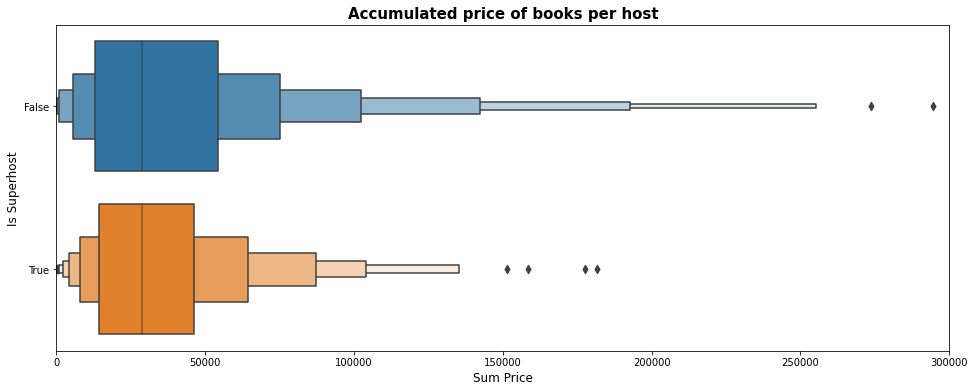

In [39]:
plt.figure(figsize=(16,6))
plt.xlim(right = 300000)
plt.title("Accumulated price of books per host")
sns.boxenplot(data = host_analysis, x = 'sum_adjusted_price', y = 'host_is_superhost')
plt.xlabel("Sum Price")
plt.ylabel("Is Superhost")
plt.savefig(fname = "Images/fig6")

Normally the accumulated price of books between Hosts and Superhosts seems to be very similar. Although of the similarity, after the median in each boxenplot part of the Host are even having more money to be received than the Superhost.

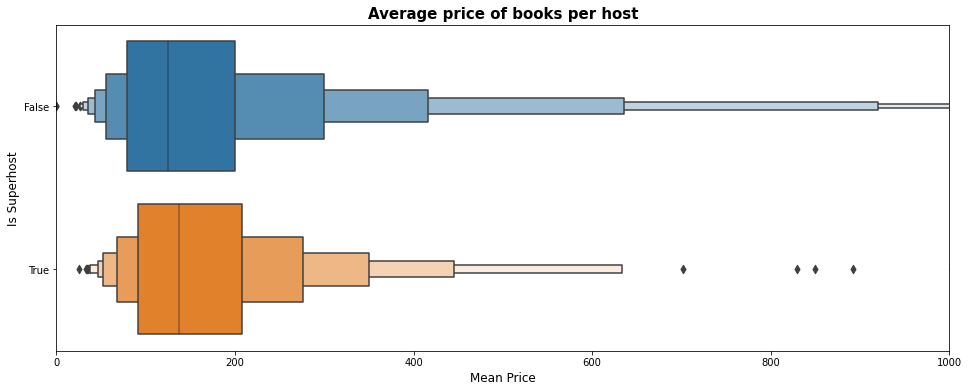

In [40]:
plt.figure(figsize=(16,6))
plt.xlim(right = 1000)
plt.title("Average price of books per host")
sns.boxenplot(data = host_analysis, x = 'mean_adjusted_price', y = 'host_is_superhost')
plt.xlabel("Mean Price")
plt.ylabel("Is Superhost")
plt.savefig(fname = "Images/fig7")

The boxenplot of the average prices, we can understand that the Superhosts are able to put higher prices for their listing than the Host.

Through the Graphs in this section cannot be seeing monetary advantages in being a Superhost instead of a Superhost. Some of the Host can even get more reservations what can result in a more profitable than the Superhost.

### 4.3. How the reviews can impact on the bookings?
___

To analyze the the impact of the reviews on the bookings will be necessary to get the `days_booked` from the `aggregated_list` and merge this information with the listing data set.

In [41]:
right_listing = listing[['id','property_type', 
                         'room_type', 'accommodates',
                         'bathrooms_text', 'bedrooms',
                         'beds', 'amenities',
                         'price', 'number_of_reviews',
                         'review_scores_rating', 'review_scores_accuracy',
                         'review_scores_cleanliness', 'review_scores_checkin',
                         'review_scores_communication', 'review_scores_location',
                         'review_scores_value', 'license', 'instant_bookable']]
listing_analysis =  aggregated_list.merge(right = right_listing, how = 'inner', left_index= True, right_on = 'id').sort_values('sum_adjusted_price', ascending=False)

In [49]:
listing_analysis.head(10)

,mean_adjusted_price,sum_adjusted_price,mean_price,sum_price,days_booked,id,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable
1962,10000.000000,3650000.0,10000.000000,3650000.0,365,39772945,Room in boutique hotel,Private room,3,1 shared bath,1.0,2.0,"[""Patio or balcony"", ""Long term stays allowed""...",10000.0,9,80.0,10.0,9.0,10.0,10.0,10.0,9.0,STR-383164,True
1961,10000.000000,3650000.0,10000.000000,3650000.0,365,39772695,Room in boutique hotel,Private room,2,1 shared bath,1.0,1.0,"[""Lock on bedroom door"", ""Bed linens"", ""Securi...",10000.0,12,80.0,8.0,8.0,9.0,9.0,9.0,8.0,STR-383164,True
786,4907.183673,1442712.0,4907.183673,1442712.0,294,17138041,Entire apartment,Entire home/apt,6,1 bath,2.0,3.0,"[""Long term stays allowed"", ""Air conditioning""...",452.0,164,93.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,True
409,5000.000000,1305000.0,5000.000000,1305000.0,261,8116523,Entire townhouse,Entire home/apt,3,1 bath,1.0,2.0,"[""Air conditioning"", ""Wifi"", ""Heating"", ""Shamp...",242.0,181,92.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,True
1619,9910.621622,1100079.0,9910.621622,1100079.0,111,33351519,Room in hotel,Hotel room,2,1 bath,1.0,1.0,"[""Elevator"", ""Long term stays allowed"", ""Air c...",190.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exempt: This listing is a hotel or motel,True
1618,9910.441441,1100059.0,9910.441441,1100059.0,111,33351516,Room in hotel,Hotel room,4,1 bath,1.0,2.0,"[""Fire extinguisher"", ""Refrigerator"", ""Iron"", ...",170.0,1,40.0,4.0,4.0,2.0,2.0,4.0,4.0,Exempt: This listing is a hotel or motel,True
1617,9910.351351,1100049.0,9910.351351,1100049.0,111,33351298,Room in hotel,Hotel room,2,1 bath,1.0,1.0,"[""Fire extinguisher"", ""Refrigerator"", ""Iron"", ...",160.0,19,96.0,10.0,10.0,10.0,10.0,10.0,9.0,Exempt: This listing is a hotel or motel,True
3130,5000.000000,685000.0,5000.000000,685000.0,137,49244928,Entire house,Entire home/apt,14,3 baths,4.0,9.0,"[""Washer"", ""Dishwasher"", ""Fire extinguisher"", ...",5000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2584,1872.877358,595575.0,1872.877358,595575.0,318,46262662,Entire apartment,Entire home/apt,4,2 baths,2.0,2.0,"[""Washer"", ""Dishwasher"", ""Fire extinguisher"", ...",2000.0,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,STR-438570,True
2843,1700.000000,535500.0,1700.000000,535500.0,315,48045698,Private room in condominium,Private room,1,1 private bath,1.0,1.0,"[""Washer"", ""Air conditioning"", ""Wifi"", ""Shampo...",1700.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


## 

In [48]:
listing_analysis['review_scores_rating'].value_counts().sort_index(ascending = False)

100.0    439
99.0     137
98.0     190
97.0     161
96.0     155
95.0     103
94.0     117
93.0     124
92.0      59
91.0      64
90.0      84
89.0      49
88.0      46
87.0      30
86.0      21
85.0      23
84.0      16
83.0       8
82.0       7
81.0       2
80.0      77
78.0       3
75.0       5
74.0       1
73.0       6
72.0       2
71.0       3
70.0      13
68.0       2
67.0       3
66.0       1
60.0      18
58.0       1
57.0       1
53.0       2
50.0       4
47.0       1
40.0       6
30.0       2
20.0       3
Name: review_scores_rating, dtype: int64

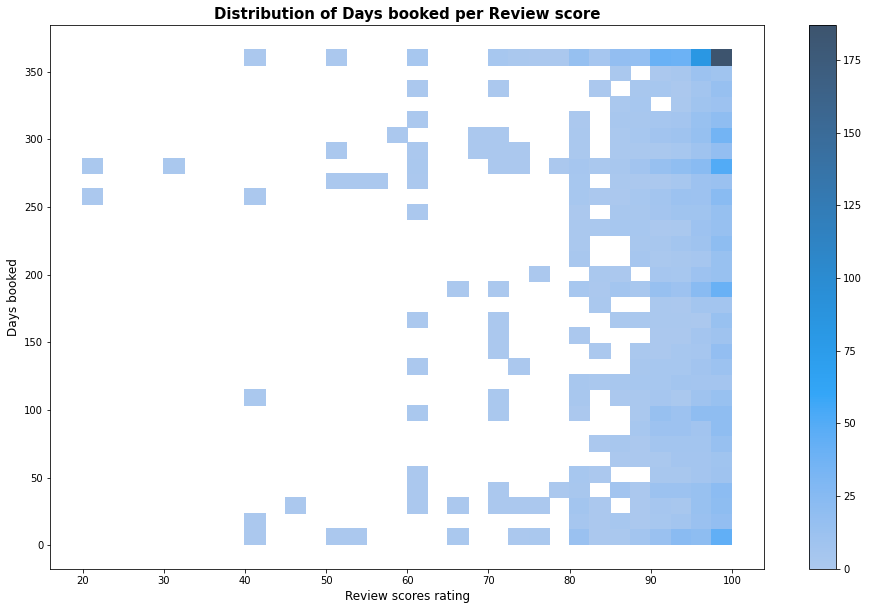

In [44]:
plt.figure(figsize=(16,10))
plt.title("Distribution of Days booked per Review score")
plt.xlabel("Review scores rating")
plt.ylabel("Days booked")
sns.histplot(data = listing_analysis, x = 'review_scores_rating', y = 'days_booked',
             bins=32, cbar=True)
plt.savefig(fname = "Images/fig8")

The histogram above show us that the reviews score over 90 is where most of the reservations concentrate. Furthermore, a lot of reservations are for a year duration and the reviews score are at 100.

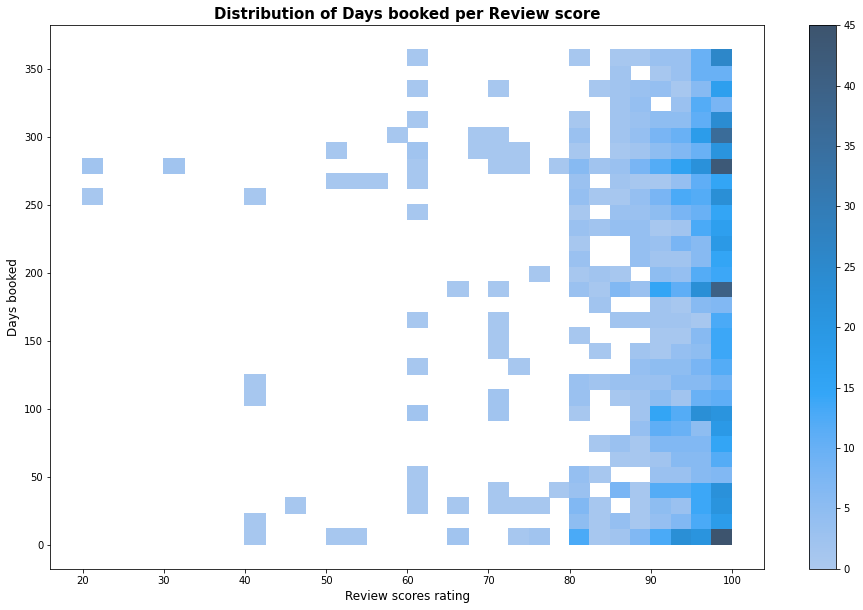

In [45]:
plt.figure(figsize=(16,10))
plt.title("Distribution of Days booked per Review score")
plt.xlabel("Review scores rating")
plt.ylabel("Days booked")
sns.histplot(data = listing_analysis[listing_analysis['days_booked'] < 365], x = 'review_scores_rating', y = 'days_booked',
             bins=32, cbar=True)
plt.savefig(fname = "Images/fig9")

Excluding the reservations over 364 days it is possible that the reservations still concentrate in the reviews score higher than 90.